In [83]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features  # data features
y = rice_cammeo_and_osmancik.data.targets   # data targets
  
# metadata 
print(rice_cammeo_and_osmancik.metadata) 
  
# variable information 
print(rice_cammeo_and_osmancik.variables) 
print(X)


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [84]:
#1 Questão: (10,0 pontos) Utilizando o banco de dados “Rice (Cammeo and Osmancik)” 
#a. O conjunto de dados  ́e univariado ou multivariado? Descreva a quantidade de atributos preditivos e atributos alvo.
#Multivariado,possui 7 atributos preditivos e um atributo alvo.
#b. Caracterize os dados quanto ao Tipo e Escala;
#             nome     tipo         escala
#0               Area  numérico     racional
#1          Perimeter  numérico     racional
#2  Major_Axis_Length  numérico     racional
#3  Minor_Axis_Length  numérico     racional
#4       Eccentricity  numérico     racional
#5        Convex_Area  numérico     racional
#6             Extent  numérico     racional
#7              Class  categórico   nominal
#c.Verifique a necessidade de balanceamento dos dados e caracterize estatisticamente os dados (calcule, para cada atributo, suas estatísticas univariadas pertinentes #dentre frequência,moda, média, mediana, desvio-padrão, Q1, Q3,obliquidade e curtose).


In [85]:
#C:
#3810 objetos com 7 atributos-calcular medidas estatisticas pertinentes para cada atributo
import pandas as pd
import scipy.stats as stats
import numpy as np
X=pd.DataFrame(X)  #transformando em dataframe para facilitar a manipulação
y=pd.DataFrame(y)
print(X.describe()) #verificando se dados necessitam balanceamento
print(y.describe())
#resultado:precisam de balanceamento,valores muito discrepantes entre os atributos
#balanceamento é necessário para que a diferença entre os valores dos atributos não influencie no resultado do modelo



               Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count   3810.000000  3810.000000        3810.000000        3810.000000   
mean   12667.727559   454.239180         188.776222          86.313750   
std     1732.367706    35.597081          17.448679           5.729817   
min     7551.000000   359.100006         145.264465          59.532406   
25%    11370.500000   426.144752         174.353855          82.731695   
50%    12421.500000   448.852493         185.810059          86.434647   
75%    13950.000000   483.683746         203.550438          90.143677   
max    18913.000000   548.445984         239.010498         107.542450   

       Eccentricity   Convex_Area       Extent  
count   3810.000000   3810.000000  3810.000000  
mean       0.886871  12952.496850     0.661934  
std        0.020818   1776.972042     0.077239  
min        0.777233   7723.000000     0.497413  
25%        0.872402  11626.250000     0.598862  
50%        0.889050  12706.500000     0

In [86]:
#Separando por atributos
Area = X['Area']  
Perimeter = X['Perimeter']
MajorAxisLength = X['Major_Axis_Length']
MinorAxisLength = X['Minor_Axis_Length']
Eccentricity= X['Eccentricity']
ConvexArea= X['Convex_Area']
Extent= X['Extent']
# Caracterizando estatisticamente os dados
print('Frequencia da classe:\n ',y.value_counts(),)  # frequencia de cada valor,o mais interessante de analisar a freq é a classe
def estatistica(df):
    dadosEstatisticas = {
        'Média': df.mean(),
        'Mediana': df.median(),
        'Moda': df.mode()[0],
        'Desvio-Padrão': df.std(),
        'Q1': df.quantile(0.25),
        'Q3': df.quantile(0.75),
        'Obliquidade': df.skew(),
        'Curtose': df.kurt()
    }
    return dadosEstatisticas
for i in X.columns:
    print(f'Atributo {i}:')
    print(estatistica(X[i]))

Frequencia da classe:
  Class   
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64
Atributo Area:
{'Média': 12667.727559055118, 'Mediana': 12421.5, 'Moda': 11422, 'Desvio-Padrão': 1732.3677060741602, 'Q1': 11370.5, 'Q3': 13950.0, 'Obliquidade': 0.32515805535674147, 'Curtose': -0.43108188393411284}
Atributo Perimeter:
{'Média': 454.23918014839893, 'Mediana': 448.85249325, 'Moda': 432.2980042, 'Desvio-Padrão': 35.59708144220462, 'Q1': 426.1447525, 'Q3': 483.683746375, 'Obliquidade': 0.22136209629875994, 'Curtose': -0.8402430678956709}
Atributo Major_Axis_Length:
{'Média': 188.7762219769291, 'Mediana': 185.8100586, 'Moda': 184.8757324, 'Desvio-Padrão': 17.44867850111315, 'Q1': 174.353855175, 'Q3': 203.55043795, 'Obliquidade': 0.260242325144115, 'Curtose': -0.9518024581111932}
Atributo Minor_Axis_Length:
{'Média': 86.3137503715958, 'Mediana': 86.43464660500001, 'Moda': 86.2791214, 'Desvio-Padrão': 5.729817333702081, 'Q1': 82.7316951775, 'Q3': 90.14367676, 'Obliquidade': -0.134896

In [87]:
#d:Analise os dados quanto à sua incompletude, inconsistências, redundâncias e presença de ruído.
#Incompletude
print('Incompletude:\n',X.isnull().sum()) #verificando se há valores nulos-resultado: não há valores nulos
#Inconsistência-procurar valores ilogicos
print('Inconsistência:\n',X[X<0].count()) #verificando se há valores negativos-resultado: não há valores negativos
#Redundância
print('Redundância:\n',X.duplicated().sum()) #verificando se há valores duplicados-resultado: não há valores duplicados
#Ruído-Ruído é a presença de dados irrelevantes ou defeituosos no dataset,que podem ser removidos
#para remover ruídos,é necessário analisar os dados e verificar se há valores que não fazem sentido-uso de gráficos pode ajudar
#neste caso,como os dados são numéricos,é possível verificar a existência de ruídos através de gráficos de boxplot,o que sera feito na parte e

Incompletude:
 Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
dtype: int64
Inconsistência:
 Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
dtype: int64
Redundância:
 0


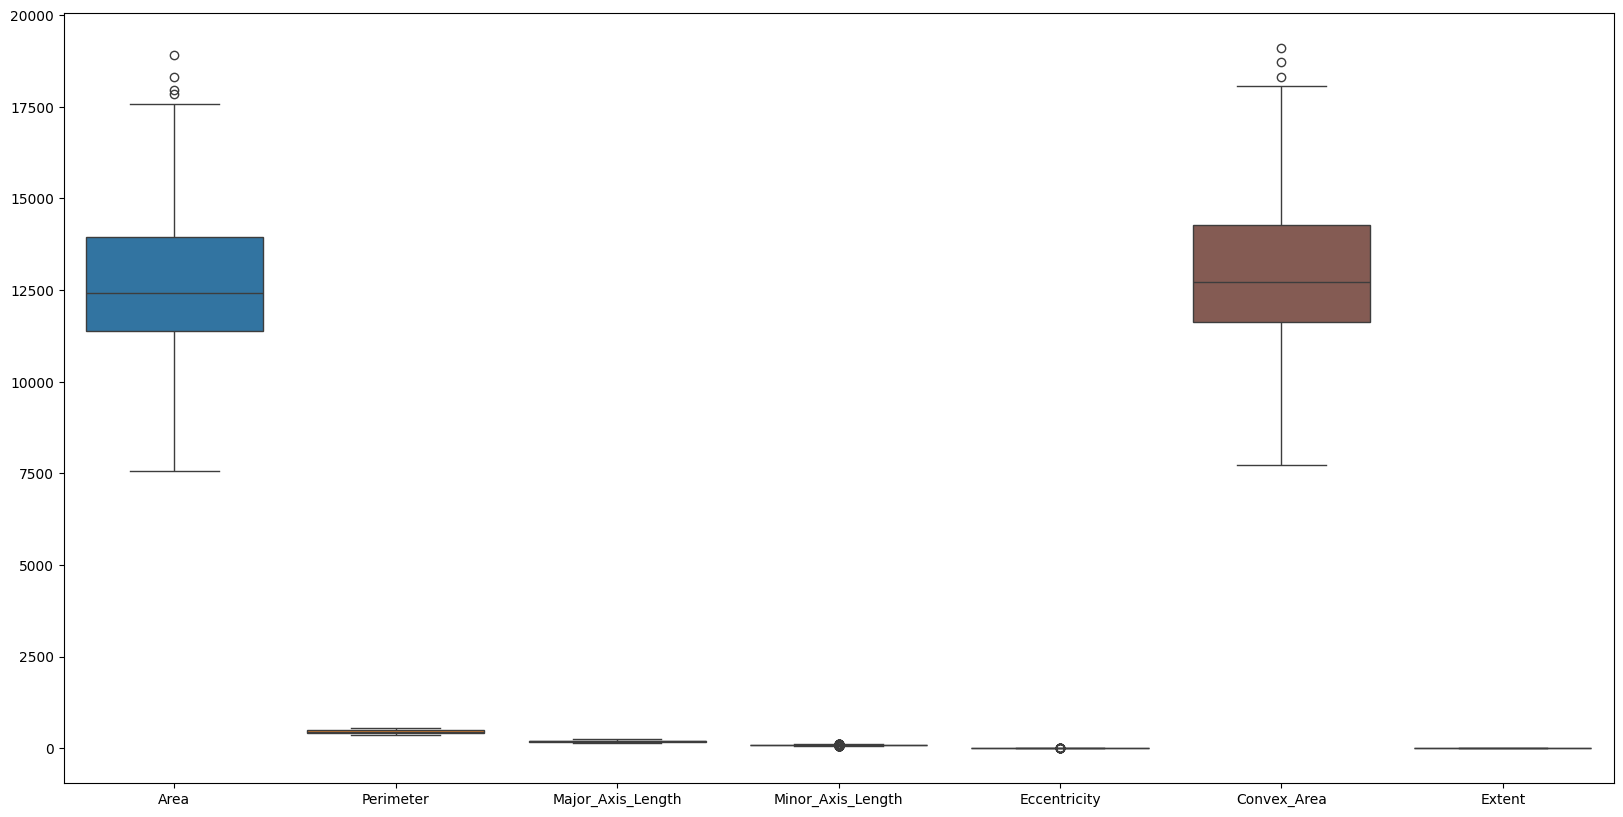

Outliers para Area:
       Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
277   17948  526.918030         214.093826         107.542450      0.864685   
600   18313  538.497986         222.464249         106.184746      0.878734   
772   17856  530.416016         223.292358         102.901276      0.887485   
1203  18913  541.745972         227.135483         106.948357      0.882209   

      Convex_Area    Extent  
277         18322  0.666370  
600         18724  0.624420  
772         18062  0.795722  
1203        19099  0.804124  
Outliers para Perimeter:
Empty DataFrame
Columns: [Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Eccentricity, Convex_Area, Extent]
Index: []
Outliers para Major_Axis_Length:
Empty DataFrame
Columns: [Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Eccentricity, Convex_Area, Extent]
Index: []
Outliers para Minor_Axis_Length:
       Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
70    16490 

In [88]:
#e:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.boxplot(data=X)
plt.show()
#presença de outliers em Area e Convex_Area
for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definindo os limites para os outliers
    bordaBaixo = Q1 - 1.5 * IQR
    bordaCima = Q3 + 1.5 * IQR

    # Identificando os outliers
    outliers = X[(X[col] < bordaBaixo) | (X[col] > bordaCima)]

    print(f'Outliers para {col}:')
    print(outliers)


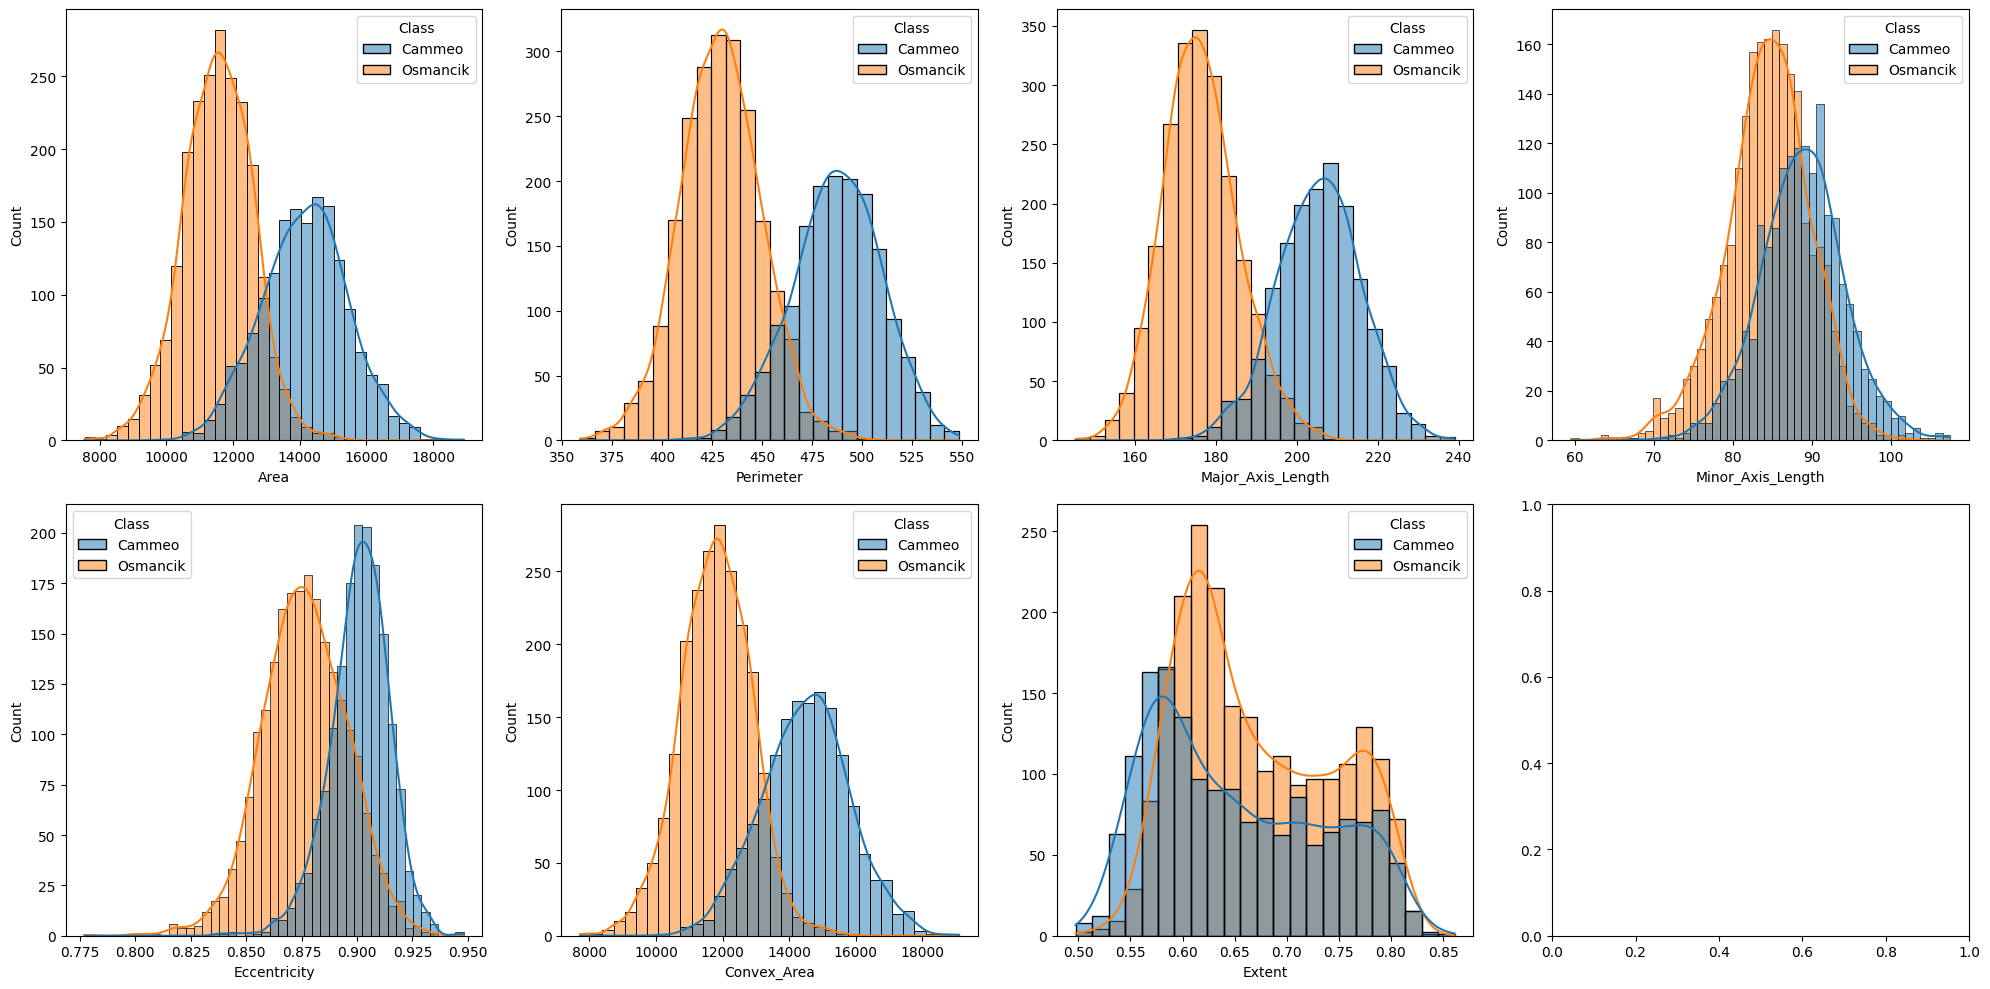

In [89]:
#f:Plote histogramas dos atributos e interprete sua distribuição, considerando as classes
dados=pd.concat([X,y],axis=1)

# Calcula o número de colunas para a grade de subplots
num_cols = np.ceil(len(X.columns) / 2).astype(int)

# Cria uma grade de subplots com 2 linhas
fig, axs = plt.subplots(2, num_cols, figsize=(20, 10))

# Ajusta axs para ser uma lista unidimensional
axs = axs.ravel()

for i, col in enumerate(X.columns):
    # Plota o histograma no subplot correspondente
    sns.histplot(data=dados, x=col, hue='Class', kde=True, ax=axs[i])

plt.tight_layout()
plt.show()

In [90]:
#Interpretacao do Histograma:
#Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area: ambas distribuições são simetricas,com a classe 1 possuindo maiores valores
#Eccentricity: distribuição simétrica,com a classe 2 possuindo maiores valores
#Extent: distribuição distorcida para a esquerda,com a classe 1 possuindo maiores valores

In [91]:
#g:Utilize a Análise de Componentes Principais (PCA) para gerar gráficos no espaço de atributos.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  #2 componentes principais
X_pca = pca.fit_transform(X) #aplicando PCA
print('Variância explicada:',pca.explained_variance_ratio_) #variância explicada por cada componente
print('Variância explicada total:',sum(pca.explained_variance_ratio_)) #variância total
#conclusao:com 2 componentes principais,é possível explicar 99% da variância total

Variância explicada: [9.99446220e-01 5.31112698e-04]
Variância explicada total: 0.9999773327065992


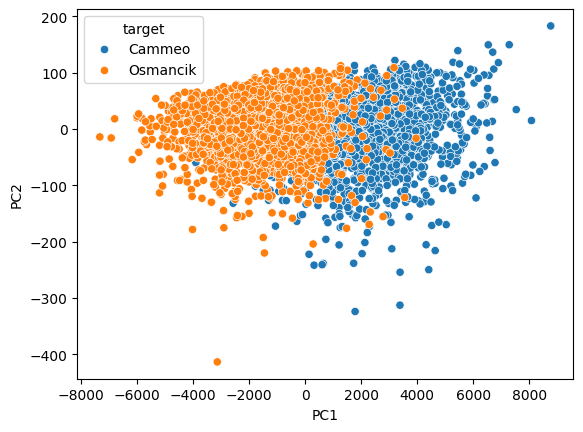

In [92]:
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2']) #transformando em dataframe
X_pca['target'] = y #adicionando target
sns.scatterplot(x='PC1', y='PC2', data=X_pca, hue='target') #plotando gráfico
plt.show()
